# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset into pandas dataframe
dataframe=pd.read_csv('/content/Zomato data .csv')

In [3]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


#Data Preprocessing

In [5]:
#converting the data type of rate column also removing '/'
def handleRate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
#checking the null value
dataframe.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


#Data Visualization

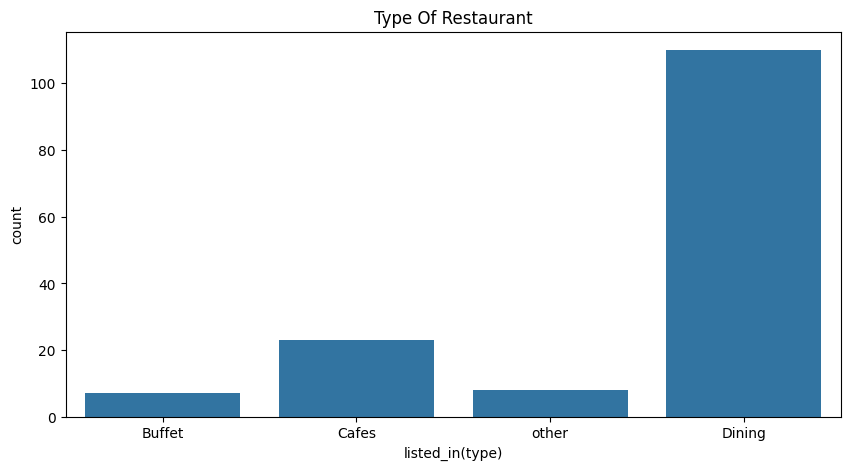

In [11]:
# What type of restaurant do the majority of customers order from
plt.figure(figsize=(10,5))
sns.countplot(x='listed_in(type)',data=dataframe)
plt.title('Type Of Restaurant')
plt.show()

Conclusion: majority of the restaurant falls in dinning category

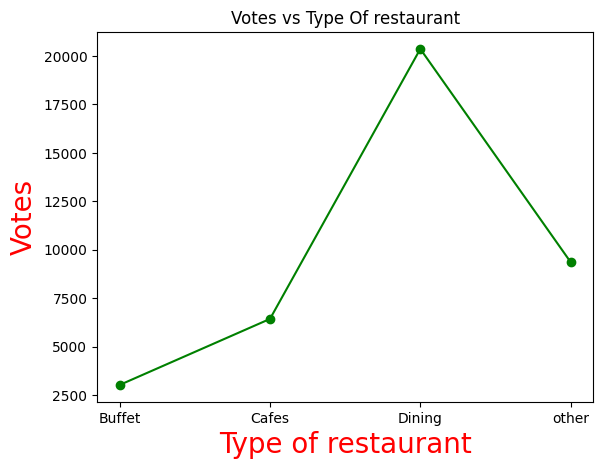

In [12]:
# How many votes has each type of restaurant received from customers?
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker="o")
plt.xlabel('Type of restaurant',c='red',size=20)
plt.ylabel('Votes',c='red',size=20)
plt.title('Votes vs Type Of restaurant')
plt.show()

conclusion-dinning restaurants has received maximum votes

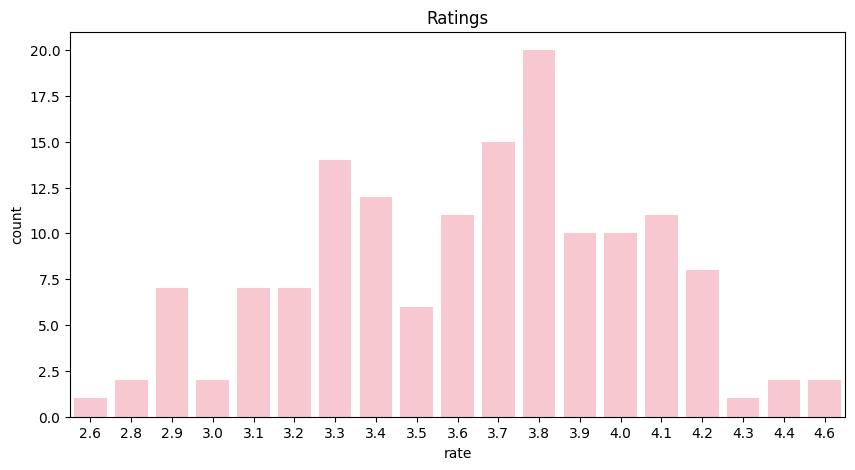

In [13]:
# what are the ratings that the majority of restaurants have received?
plt.figure(figsize=(10,5))
sns.countplot(x='rate',data=dataframe,color='pink')
plt.title('Ratings')
plt.show()

conclusion- Majority Restaurants have received 3.8 ratings

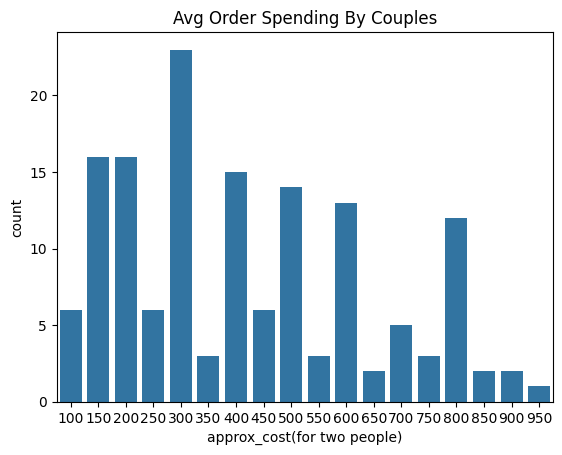

In [14]:
# average order spending by couples
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.title('Avg Order Spending By Couples')
plt.show()

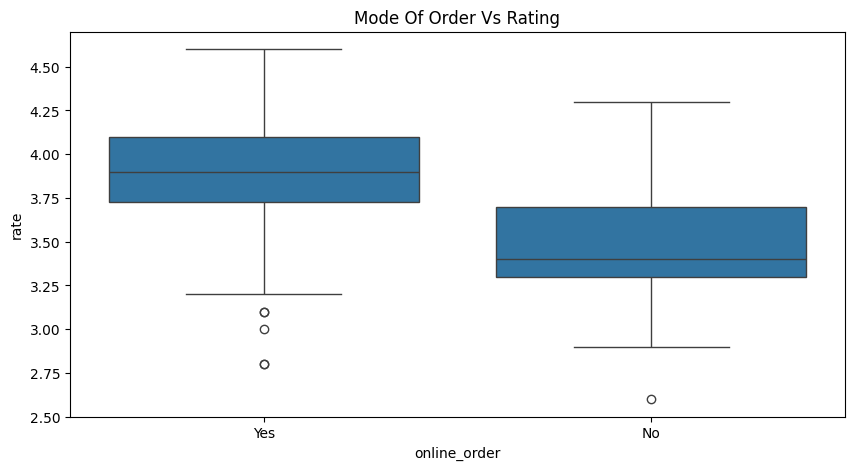

In [15]:
# which mode has received the maximum rating?
plt.figure(figsize=(10,5))
sns.boxplot(x='online_order',y='rate',data=dataframe)
plt.title('Mode Of Order Vs Rating')
plt.show()

conclusion: online order has maximum rating compared to offline

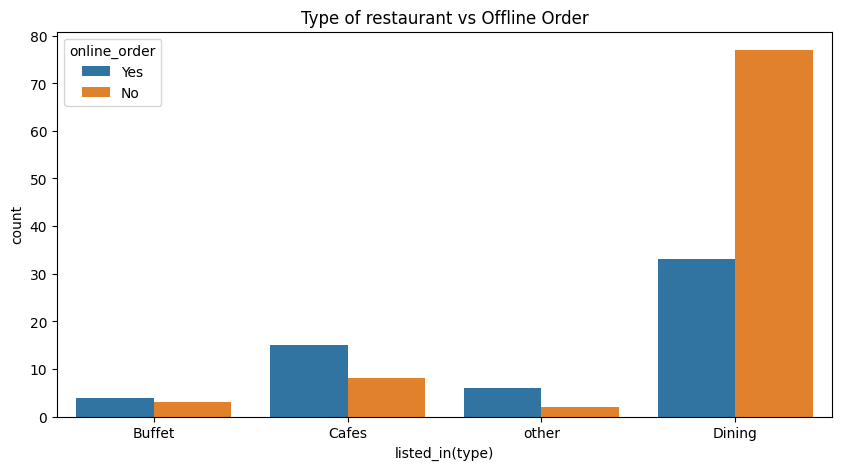

In [16]:
#which type of restaurant received more offline orders ?
plt.figure(figsize=(10,5))
sns.countplot(x='listed_in(type)',hue='online_order',data=dataframe)
plt.title('Type of restaurant vs Offline Order')
plt.show()

Conclusion- Dinning type of restaurant received more offline orders